# TSARNN Homework 5 - Maximilian Rokuss and Julius Meyer-Ohlendorf



### **Task 1**

KL divergence of two Gaussians

\begin{aligned}
&\int[\log (p(x))-\log (q(x))] p(x) d x\\
&=\int\left[-\frac{1}{2} \log (2 \pi)-\log \left(\sigma_{1}\right)-\frac{1}{2}\left(\frac{x-\mu_{1}}{\sigma_{1}}\right)^{2}+\frac{1}{2} \log (2 \pi)+\log \left(\sigma_{2}\right)+\frac{1}{2}\left(\frac{x-\mu_{2}}{\sigma_{2}}\right)^{2}\right]\\
&\times \frac{1}{\sqrt{2 \pi} \sigma_{1}} \exp \left[-\frac{1}{2}\left(\frac{x-\mu_{1}}{\sigma_{1}}\right)^{2}\right] d x\\
&=\int\left\{\log \left(\frac{\sigma_{2}}{\sigma_{1}}\right)+\frac{1}{2}\left[\left(\frac{x-\mu_{2}}{\sigma_{2}}\right)^{2}-\left(\frac{x-\mu_{1}}{\sigma_{1}}\right)^{2}\right]\right\} \times \frac{1}{\sqrt{2 \pi} \sigma_{1}} \exp \left[-\frac{1}{2}\left(\frac{x-\mu_{1}}{\sigma_{1}}\right)^{2}\right] d x\\
&=E_{1}\left\{\log \left(\frac{\sigma_{2}}{\sigma_{1}}\right)+\frac{1}{2}\left[\left(\frac{x-\mu_{2}}{\sigma_{2}}\right)^{2}-\left(\frac{x-\mu_{1}}{\sigma_{1}}\right)^{2}\right]\right\}\\
&=\log \left(\frac{\sigma_{2}}{\sigma_{1}}\right)+\frac{1}{2 \sigma_{2}^{2}} E_{1}\left\{\left(X-\mu_{2}\right)^{2}\right\}-\frac{1}{2 \sigma_{1}^{2}} E_{1}\left\{\left(X-\mu_{1}\right)^{2}\right\}\\
&=\log \left(\frac{\sigma_{2}}{\sigma_{1}}\right)+\frac{1}{2 \sigma_{2}^{2}} E_{1}\left\{\left(X-\mu_{2}\right)^{2}\right\}-\frac{1}{2}\\
&\text { (Now note that }\\
&\left.\left(X-\mu_{2}\right)^{2}=\left(X-\mu_{1}+\mu_{1}-\mu_{2}\right)^{2}=\left(X-\mu_{1}\right)^{2}+2\left(X-\mu_{1}\right)\left(\mu_{1}-\mu_{2}\right)+\left(\mu_{1}-\mu_{2}\right)^{2}\right)\\
&=\log \left(\frac{\sigma_{2}}{\sigma_{1}}\right)+\frac{1}{2 \sigma_{2}^{2}}\left[E_{1}\left\{\left(X-\mu_{1}\right)^{2}\right\}+2\left(\mu_{1}-\mu_{2}\right) E_{1}\left\{X-\mu_{1}\right\}+\left(\mu_{1}-\mu_{2}\right)^{2}\right]-\frac{1}{2}\\
&=\log \left(\frac{\sigma_{2}}{\sigma_{1}}\right)+\frac{\sigma_{1}^{2}+\left(\mu_{1}-\mu_{2}\right)^{2}}{2 \sigma_{2}^{2}}-\frac{1}{2}
\end{aligned}


1.) $\boldsymbol{\mu}_{1}=\boldsymbol{\mu}_{2} \text { and } \sigma_{1}=\sigma_{2}$

$KL(P||Q) = 0$

2.) $\boldsymbol{\mu}_{1}=0 $ $\boldsymbol{\mu}_{2} = 1 \text { and } \sigma_{1}= 2$ $\sigma_{2} = 1$

$KL(P||Q) = \log \left(\frac{1}{2}\right)+\frac{2^{2}+\left(0-1\right)^{2}}{2 \cdot1^{2}}-\frac{1}{2} \approx 1.3$


### **Task 2**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading data
location = '/content/drive/MyDrive/Colab Notebooks/TSARNN/TSARNN_Ex5/'
filename = "ex5.mat"
mat = spio.loadmat(location + filename)
z = mat["z"]
x = mat["x"]
A = mat["A"]
B = mat["B"]
C = mat["C"]
u = mat["u"]
Sigma = mat["Sigma"]
Gamma = mat["Gamma"]
L0 = mat["L0"]
mu0 = mat["mu0"]

##1.)

In [ ]:
# Kalman-filter Recursion
mu = np.zeros((2,100))
L_t = L0
mu0 = np.reshape(mu0, (2,))
mu[:,0] = mu0
L_t_arr = []
V_t_arr = []
for t in range(1, 100):
    K_t = L_t @ B.T @ np.linalg.inv(B @ L_t @ B.T + Gamma)
    V_t = (np.identity(2) - K_t @ B) @ L_t
    L_t = A  @ V_t @ A.T + Sigma
    L_t_arr.append(L_t)
    V_t_arr.append(V_t)
    mu[:, t] = A @ mu[:, t-1] + C[:,0] * u[0 ,t] + K_t @ (x[:, t] - B @ (A @ mu[:, t-1] + C[:,0] * u[0 ,t]))

##2.)

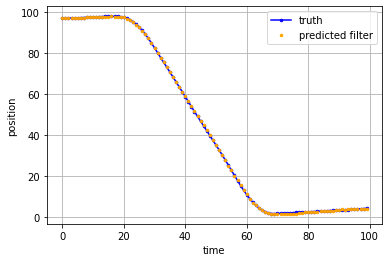

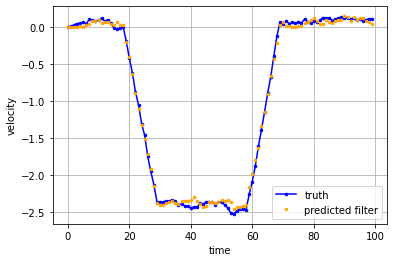

In [ ]:
# calculate mean squared error
MSE_filter_pos = np.mean((z[0] - mu[0])**2)
MSE_filter_vel = np.mean((z[1] - mu[1])**2)


# true latent state and predicted latent state as function of time
plt.figure(0)
plt.plot(z[0],'.-', markersize='5', color='b', label='truth')
plt.plot(mu[0],'.', markersize='5', color='orange', label='predicted filter')
plt.xlabel('time')
plt.ylabel('position')
plt.legend()
plt.grid()
plt.show()

plt.figure(1)
plt.plot(z[1],'.-', markersize='5', color='b', label='truth')
plt.plot(mu[1],'.', markersize='5', color='orange', label='predicted filter')
plt.xlabel('time')
plt.ylabel('velocity')
plt.legend()
plt.grid()
plt.show()


The position drops from about from 100 to 0. The velocity plot also supports that the drone might be descending from a higher to a lower altitude.

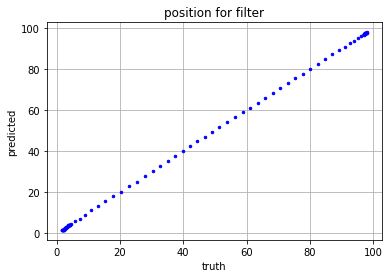

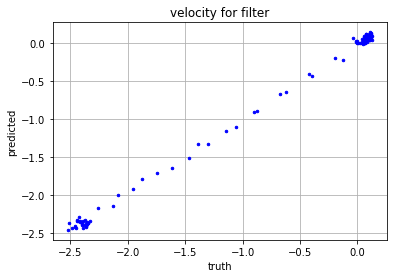

In [ ]:
# predicted against true latent states
plt.figure(2)
plt.title('position for filter')
plt.plot(z[0], mu[0], '.', markersize='5', color='b')
plt.xlabel('truth')
plt.ylabel('predicted')
plt.grid()
plt.show()

plt.figure(3)
plt.title('velocity for filter')
plt.plot(z[1], mu[1], '.', markersize='5', color='b')
plt.xlabel('truth')
plt.ylabel('predicted')
plt.grid()
plt.show()

As one can see, the predicted latent states of the position are in better accordance with the truth than the latent velocity predictions.

##3.)

In [ ]:
print('A: \n', A)
print('C: \n', C)

A: 
 [[1 1]
 [0 1]]
C: 
 [[0.5]
 [1. ]]


The choice of the matrices ensures the following:
- Due to $A[1][0]=0$ there is no mixing of the previous two components for the current second component $\mu_{t,2}$
- Due to the choice of C the effect of the controller is less for the first component $\mu_{t,1}$ than for the second compenent $\mu_{t,2}$

4.)

In [ ]:
# Kalman-filter smoother
mu_new = np.zeros((2,100))
mu_new[:,0] = mu[:,-1]

for t in range(2, 100):
    mu_new[:, (t-1)] = mu[:,-t] +  V_t_arr[-t] @ A.T @ np.linalg.inv(L_t_arr[-t]) @ (mu_new[:, (t-2)] - A @ mu[:,-t])


# flip array to get right time evolution
mu_new = np.flip(mu_new, axis=1)

5.)

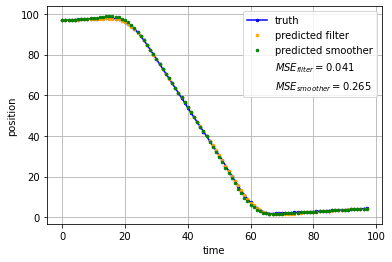

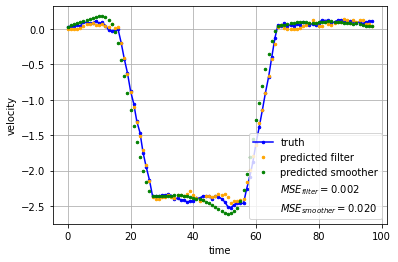

In [ ]:
# get rid of first value
z = z[:, 1:]
mu = mu[:, 1:]
mu_new = mu_new[:, 1:]

# calculate mean squared error
MSE_smoother_pos = np.mean((z[0] - mu_new[0])**2)
MSE_smoother_vel = np.mean((z[1] - mu_new[1])**2)


# true latent state and predicted latent state as function of time
plt.figure(4)
plt.plot(z[0],'.-', markersize='5', color='b', label='truth')
plt.plot(mu[0],'.', markersize='5', color='orange', label='predicted filter')
plt.plot(mu_new[0],'.', markersize='5', color='green', label='predicted smoother')
plt.plot([], [], ' ', label=r'$MSE_{filter}=$'+'{0:.3f}'.format(MSE_filter_pos))
plt.plot([], [], ' ', label=r'$MSE_{smoother}=$'+'{0:.3f}'.format(MSE_smoother_pos))
plt.xlabel('time')
plt.ylabel('position')
plt.legend()
plt.grid()
plt.show()


plt.figure(5)
plt.plot(z[1],'.-', markersize='5', color='b', label='truth')
plt.plot(mu[1],'.', markersize='5', color='orange', label='predicted filter')
plt.plot(mu_new[1],'.', markersize='5', color='green', label='predicted smoother')
plt.plot([], [], ' ', label=r'$MSE_{filter}=$'+'{0:.3f}'.format(MSE_filter_vel))
plt.plot([], [], ' ', label=r'$MSE_{smoother}=$'+'{0:.3f}'.format(MSE_smoother_vel))
plt.xlabel('time')
plt.ylabel('velocity')
plt.legend()
plt.grid()
plt.show()

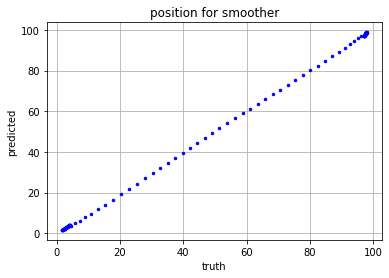

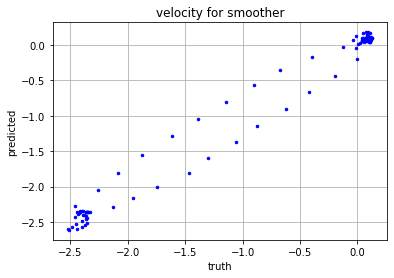

In [ ]:
# predicted against true latent states
plt.figure(6)
plt.title('position for smoother')
plt.plot(z[0], mu_new[0], '.', markersize='5', color='b')
plt.xlabel('truth')
plt.ylabel('predicted')
plt.grid()
plt.show()

plt.figure(7)
plt.title('velocity for smoother')
plt.plot(z[1], mu_new[1], '.', markersize='5', color='b')
plt.xlabel('truth')
plt.ylabel('predicted')
plt.grid()
plt.show()

As one can see the predictions of the velocity using the Kalman-smoother are not very well in accordance with the truth. In general all results are worse compared to the Kalman-filter, which is also reflected by the MSE values (see plots). Normally one would expect, that Kalman-smoother results should be better. Hence, we suspect a mistake in the implemented Kalmann-smoother loop.